# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

1.cost >=0

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

DFS的优势在于空间复杂度低，但是由于一口气找到最深的节点，所以通常未必能找到最优解，如果一层一层使用DFS做搜索，逐渐加深层数，直到找到goalnode为止，就可以找到最优解，而且同时具有低空间复杂度的优势。

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

如果需要最优解： BFS 
如果空间有限制： DFS


##### 2.4 When can we use machine learning ?

分类，

##### 2.5 What is the gradient of a function ?

$\forall {x}_{i}$ $$\ lim_{\Delta{x}_{i}\rightarrow0} (\frac{{f({x}_{i}+\Delta{x}_{i})-f({x}_{i})}}{\Delta{x}_{i}})_i $$

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

In [ ]:
把方程乘-1,用梯度下降找最小点，再跟边界值比较大小，取最小值，最后再乘符号回去。

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [140]:
import re
import requests
from bs4 import BeautifulSoup
import json
import time
import pandas as pd
from collections import defaultdict

In [4]:
r=requests.get('https://blog.csdn.net/GISShiXiSheng/article/details/44976241')
text=r.text
with open('beijing_subway_data_web.html','w',encoding='utf-8') as html_file :
    html_file.write(text)

In [5]:
from bs4 import BeautifulSoup 
with open('beijing_subway_data_web.html', 'rb') as file:
    html = file.read() 
    bs = BeautifulSoup(html,"html.parser")

In [17]:
contents=bs.contents
contents

           if ($(this).attr("data-name") == username) {
                     $(this).html("关注").addClass('btn-red-follow').removeClass('btn-gray-follow attented');
                 }
             }
         })
         if (username == $('p.csdn-tracking-statistics').attr("username")) {
             if (flag) {
                 $('#btnAttent').addClass("attented").text("已关注").removeClass('btn-red-hollow').addClass('btn-gray-hollow');
                 changeFans(1)
             } else {
                 $('#btnAttent').text("关注").addClass('btn-red-hollow').removeClass('btn-gray-hollow attented');
                 changeFans(-1)
             }
         }
 
     }
 
     function changeFans(num) {
         if ($('#fan').text().indexOf('+') < 0) {
             $('#fan').text(parseInt($('#fan').text()) + num);
         } else {
             $('#fanBox').attr('title', parseInt($('#fanBox').attr('title')) + num);
         }
     }
     window.csdn = window.csdn ? window.csdn : {};
     window.

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [79]:
table=bs.find(id='stops')
print(type(table))

<class 'bs4.element.Tag'>


In [131]:
rows=table.find_all_next('tr')
rows[2].text.split('\n')

['BV10013394',
 '巴沟',
 'ba gou',
 '116.294',
 '39.9742',
 '110001|110024',
 '0',
 '1',
 '']

In [168]:
data=defaultdict(list)
line_name=''
for i,row in enumerate(rows):
    #print(i)
    items=row.text.split('\n')
    if i==0: continue
    elif (i!=0) & (len(items)<8):
        line_name=items[0]
    elif (i!=0) & (len(items)>8):
        #print(line,items[1],items[3],items[4])
        data['line_name'].append(line_name)
        data['stop_name'].append(items[1])
        data['lon'].append(items[3])
        data['lat'].append(items[4])
        if (line_name == '10号线') or (line_name == '2号线'):
            data['loop_line'].append('ture')
        else:
            data['loop_line'].append('false')
    else: continue
data_tosave=pd.DataFrame(dict(data))
line_14_east=data_tosave[data_tosave['line_name']=='14号线东段']
line_14_mid=data_tosave[data_tosave['line_name']=='14号线中段']
line_14_west=data_tosave[data_tosave['line_name']=='14号线西段']

data_tosave=data_tosave.drop(list(line_14_east.index)+list(line_14_mid.index)+list(line_14_west.index))
line_14_east['line_name']='14号线'
line_14_mid['line_name']='14号线'
line_14_west['line_name']='14号线'
data_tosave=pd.concat([data_tosave,line_14_east,line_14_mid,line_14_west])
data_tosave.index=range(data_tosave.index.size)
data_tosave.to_csv('beijing_subway_data.csv')

In [173]:
lines=data_tosave['line_name'].drop_duplicates()
lines

0         10号线
45         2号线
63        13号线
79         房山线
90         昌平线
97         9号线
110        八通线
123        1号线
146        亦庄线
159        5号线
182        7号线
202        8号线
219    4号线/大兴线
254       机场专线
258       15号线
277        6号线
305       14号线
Name: line_name, dtype: object

In [174]:
subway_connections=defaultdict(list)
for line in lines:
    temp_data=data_tosave[data_tosave['line_name']==line]
    if temp_data['loop_line'][temp_data.index[0]]== 'true':
        for i in temp_data.index:
            if i== temp_data.index[0] :
                subway_connections[temp_data['stop_name'][i]].append(temp_data['stop_name'][temp_data.index[1]])
                subway_connections[temp_data['stop_name'][i]].append(temp_data['stop_name'][temp_data.index[-1]])
            elif i== temp_data.index[-1]:
                subway_connections[temp_data['stop_name'][i]].append(temp_data['stop_name'][temp_data.index[0]])
                subway_connections[temp_data['stop_name'][i]].append(temp_data['stop_name'][temp_data.index[-2]])
            else:
                subway_connections[temp_data['stop_name'][i]].append(temp_data['stop_name'][i+1])
                subway_connections[temp_data['stop_name'][i]].append(temp_data['stop_name'][i-1])
            
    else:
        for i in temp_data.index:
            if i== temp_data.index[0] :
                subway_connections[temp_data['stop_name'][i]].append(temp_data['stop_name'][temp_data.index[1]])
            elif i== temp_data.index[-1]:
                subway_connections[temp_data['stop_name'][i]].append(temp_data['stop_name'][temp_data.index[-2]])
            else:
                subway_connections[temp_data['stop_name'][i]].append(temp_data['stop_name'][i+1])
                subway_connections[temp_data['stop_name'][i]].append(temp_data['stop_name'][i-1])
subway_connections 

    

defaultdict(list,
            {'巴沟': ['苏州街'],
             '苏州街': ['海淀黄庄', '巴沟'],
             '海淀黄庄': ['知春里', '苏州街', '中关村', '人民大学'],
             '知春里': ['知春路', '海淀黄庄'],
             '知春路': ['西土城', '知春里', '五道口', '大钟寺'],
             '西土城': ['牡丹园', '知春路'],
             '牡丹园': ['健德门', '西土城'],
             '健德门': ['北土城', '牡丹园'],
             '北土城': ['安贞门', '健德门', '奥体中心', '安华桥'],
             '安贞门': ['惠新西街南口', '北土城'],
             '惠新西街南口': ['芍药居', '安贞门', '惠新西街北口', '和平西桥'],
             '芍药居': ['太阳宫', '惠新西街南口', '光熙门', '望京西'],
             '太阳宫': ['三元桥', '芍药居'],
             '三元桥': ['亮马桥', '太阳宫', '东直门', 'T3航站楼'],
             '亮马桥': ['农业展览馆', '三元桥'],
             '农业展览馆': ['团结湖', '亮马桥'],
             '团结湖': ['呼家楼', '农业展览馆'],
             '呼家楼': ['金台夕照', '团结湖', '东大桥', '金台路'],
             '金台夕照': ['国贸', '呼家楼'],
             '国贸': ['双井', '金台夕照', '大望路', '永安里'],
             '双井': ['劲松', '国贸'],
             '劲松': ['潘家园', '双井'],
             '潘家园': ['十里河', '劲松'],
             '十里河': ['分钟寺', '潘家

In [177]:
stop_position={}
for i in data_tosave.index :
    if data_tosave['stop_name'][i] in stop_position.keys() : continue
    else:
        stop_position[data_tosave['stop_name'][i]] = (float(data_tosave['lon'][i]),float(data_tosave['lat'][i]))
stop_position

{'巴沟': (116.294, 39.9742),
 '苏州街': (116.306, 39.9756),
 '海淀黄庄': (116.318, 39.976),
 '知春里': (116.329, 39.9763),
 '知春路': (116.34, 39.9765),
 '西土城': (116.354, 39.9762),
 '牡丹园': (116.37, 39.9763),
 '健德门': (116.381, 39.9767),
 '北土城': (116.394, 39.9769),
 '安贞门': (116.406, 39.977),
 '惠新西街南口': (116.418, 39.977),
 '芍药居': (116.436, 39.9779),
 '太阳宫': (116.448, 39.9727),
 '三元桥': (116.457, 39.9614),
 '亮马桥': (116.462, 39.9494),
 '农业展览馆': (116.462, 39.9416),
 '团结湖': (116.462, 39.9337),
 '呼家楼': (116.462, 39.9232),
 '金台夕照': (116.462, 39.9167),
 '国贸': (116.46, 39.9084),
 '双井': (116.462, 39.8935),
 '劲松': (116.461, 39.8844),
 '潘家园': (116.461, 39.8755),
 '十里河': (116.458, 39.8659),
 '分钟寺': (116.454, 39.8519),
 '成寿寺': (116.447, 39.8459),
 '宋家庄': (116.428, 39.8457),
 '石榴庄': (116.414, 39.8459),
 '大红门': (116.399, 39.8454),
 '角门东': (116.385, 39.8451),
 '角门西': (116.371, 39.8459),
 '草桥': (116.351, 39.8459),
 '纪家庙': (116.333, 39.8444),
 '首经贸': (116.32, 39.8445),
 '丰台站': (116.305, 39.8499),
 '泥洼': (116.304, 39.8582)

In [179]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

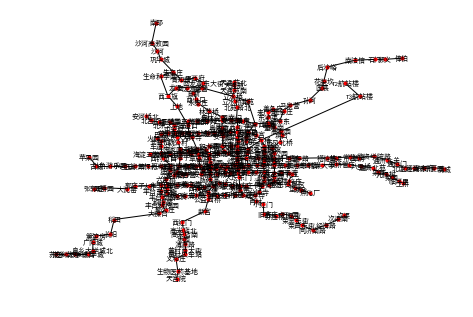

In [185]:
connection_graph = nx.Graph(subway_connections)
nx.draw(connection_graph,stop_position,with_labels=True,node_size=10,font_size=7)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [191]:
import math

In [205]:
def search(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！
            
        if froniter == destination:# ！
            return '->'.join(path)# ！
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes) 
        ''' 在进入下一轮搜索前先先用search strategy对pathes排序，
        下一轮就可以先搜索最需要先被搜索的path。(这里只有考虑已经走
        过的路径距离加总，如果还要考虑最后到destination 的距离的话，
        要在pathes每个元素最后加上destinatioin。)'''
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  
        

In [199]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_stop_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [186]:
def get_stop_distance(stop1,stop2):

    lon1, lat1 = stop_position[stop1]
    lon2, lat2 = stop_position[stop2]
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (1-math.sin(math.radians(lat1))*math.sin(math.radians(lat2))-math.cos(math.radians(lat1))*math.cos(math.radians(lat2))*math.cos(dlon))/2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [194]:
get_stop_distance('五道口','大钟寺')

2.9846289105426727

In [206]:
search(connection_graph,"清华东路西口","雍和宫",search_strategy=sort_by_distance)

'清华东路西口->六道口->北沙滩->奥林匹克公园->奥体中心->北土城->安华桥->鼓楼大街->安定门->雍和宫'

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 